# Python Module II: Data processing and Visualization

In this hands-on lecture session, you will learn how to use Python to explore and visualize data. Before running any models, a data scientist must understand of properties and relationships in a dataset. There are two goals for data exploration and visualization:

i) to understand the relationships between data columns. 

ii) to identify useful features for building the model in your data project.

# Part 1: Data Visualization
Python supports the matplotlib library that gives extensive graphical capabilities.  Additionally, the Python Pandas library adds higher level plotting capability. These features make Python a useful language to create visualizations of your data when exploring relationships between the data features. 

First we have to load the data set.

In [1]:
import pandas as pd

infile='data/traffic_data.csv'  
df=pd.read_csv(infile,parse_dates=['measurement_start'],usecols=['zone_id','measurement_start','speed','volume','occupancy'])

df=df[df['zone_id']==10895]
print(df.shape[0])

df=df.sort_values('measurement_start')

print(df.head())

2016
     zone_id   measurement_start      speed  volume  occupancy
180    10895 2017-11-03 00:00:00  57.511966      48   1.577778
181    10895 2017-11-03 00:05:00  57.952963      55   1.400000
182    10895 2017-11-03 00:10:00  57.243963      70   2.333333
183    10895 2017-11-03 00:15:00  60.220578      59   1.711111
184    10895 2017-11-03 00:20:00  60.527407      55   2.022222


In [2]:
# remove the zone_id column, since we are working with the data from one detector only
df.drop('zone_id',1,inplace=True)

print(df.head())

      measurement_start      speed  volume  occupancy
180 2017-11-03 00:00:00  57.511966      48   1.577778
181 2017-11-03 00:05:00  57.952963      55   1.400000
182 2017-11-03 00:10:00  57.243963      70   2.333333
183 2017-11-03 00:15:00  60.220578      59   1.711111
184 2017-11-03 00:20:00  60.527407      55   2.022222


C:\Users\sguo18\AppData\Local\Temp\2/ipykernel_19312/4259189781.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('zone_id',1,inplace=True)


## Best to way to *visualize one specific colume* of data?

What matters: range of values, and frequency of observations in a specific range. 

### Histogram 

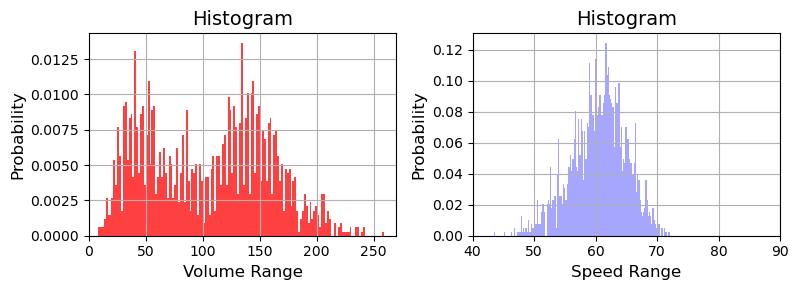

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,2,figsize=(8,3))

#plt the histogram using hist function 
# document: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

#we show the histogram of volume first. 
n, bins, patches = ax[0].hist(df['volume'], bins=150, density=True, facecolor='r', alpha=0.75)
ax[0].set_xlabel('Volume Range',fontsize=12) #x title
ax[0].set_ylabel('Probability',fontsize=12) #y title
ax[0].set_title('Histogram',fontsize=14) #figure titile
ax[0].set_xlim([0, 270]) # x lim
ax[0].grid(True) #set of the grid 

#speed profile 
n, bins, patches = ax[1].hist(df['speed'], bins=150, density=True, facecolor='b', alpha=0.35)
ax[1].set_xlabel('Speed Range',fontsize=12) #x title
ax[1].set_ylabel('Probability',fontsize=12) #y title
ax[1].set_title('Histogram',fontsize=14) #figure titile
ax[1].set_xlim([40, 90]) # x lim
ax[1].grid(True) #set of the grid 

plt.tight_layout()
plt.show()

Instead of using matplotlib, which is a more general purpose visualization library, lets try searborn!

Seaborn is a high level integration of matplotlib and can help you to generate nice visualization more easily. 

If you want more low-level control, go to matplotlib. If you want nice off-the-shelf solution, go to seaborn. 

Documentation: https://seaborn.pydata.org/

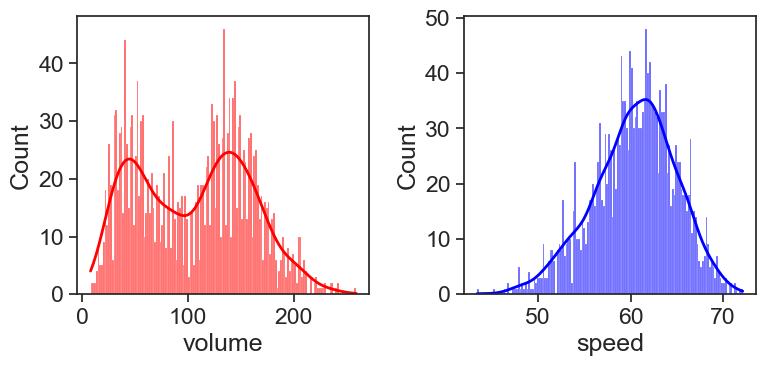

In [4]:
import seaborn as sns

#control the aesthetics
#chek more here: https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

fig,ax=plt.subplots(1,2,figsize=(8,4))
#use grid to bin the data
sns.histplot(ax=ax[0],data=df, bins=150,color='r',alpha=0.6,x="volume", kde=True) #fit a kde continuous distribution
sns.histplot(ax=ax[1],data=df, bins=150,color='b',alpha=0.6,x="speed",kde=True)

plt.tight_layout()
plt.show()

## What about pairwise comparison?

Consider the case when you would like to explroe the relationship between two columns of data in your dataset. 

### Option 1: You can stack the histogram in the same plot 

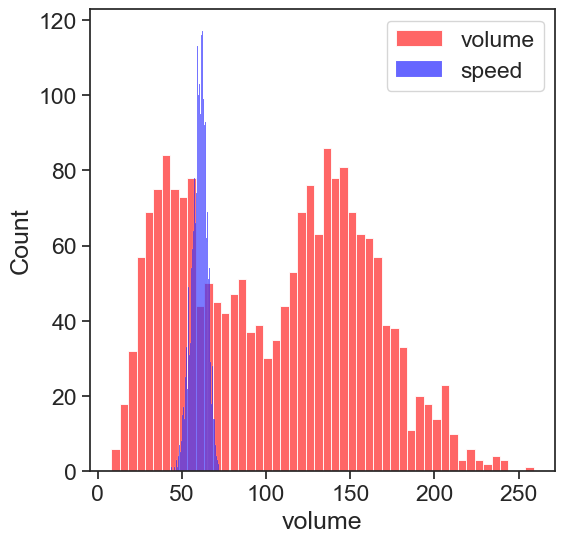

In [5]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
#use grid to bin the data
sns.histplot(ax=ax,data=df, bins=50,color='r',alpha=0.6,x="volume",label='volume') #fit a kde continuous distribution
sns.histplot(ax=ax,data=df, bins=50,color='b',alpha=0.6,x="speed",label='speed')
plt.legend()

### Option 2: Scatter Plot
Scatter plot visualize the pairwise values of two variabels (x,y), with x=value of variable 1 and y=value of variable 2. 

Documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<AxesSubplot:xlabel='volume', ylabel='speed'>

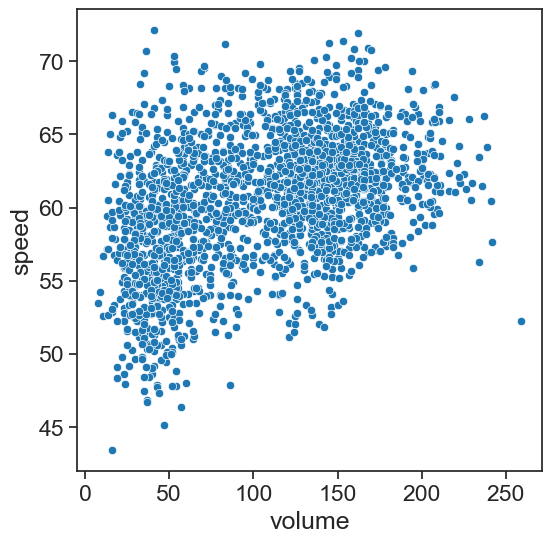

In [6]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
#use grid to bin the data
sns.scatterplot(data=df,x='volume',y='speed')


# consider change the alpha value 
#sns.scatterplot(data=df,x='volume',y='speed', alpha=0.1,s=100,marker='s')

### Option 3: 2-D histogram

<AxesSubplot:xlabel='volume', ylabel='speed'>

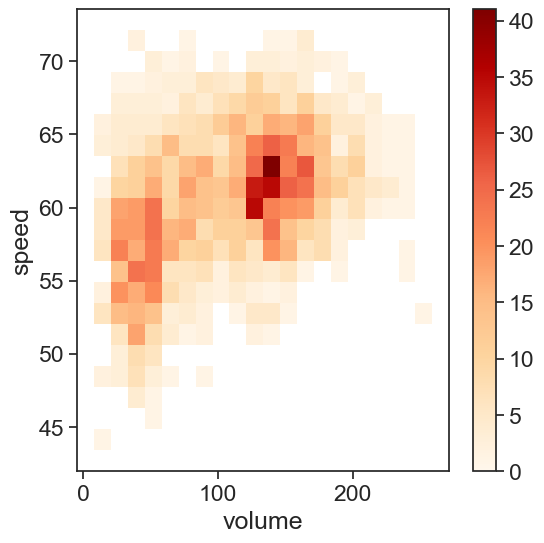

In [7]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
# sns.histplot(data=df,x='volume',y='speed',cbar=True)

#options for colormap: 
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

#lets change the colormap
sns.histplot(data=df,x='volume',y='speed',cbar=True, bins=20,cmap='OrRd')

### Option 4: Contour plot

Documentation: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

<AxesSubplot:xlabel='volume', ylabel='speed'>

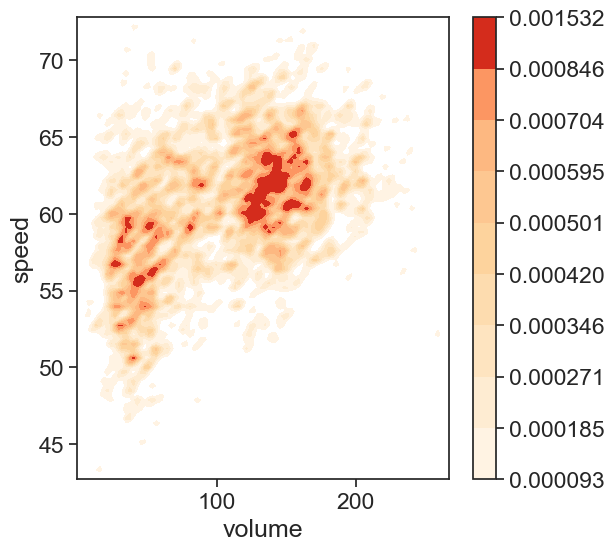

In [8]:
fig,ax=plt.subplots(1,1,figsize=(6,6))

#a few parameters to control the granuity of your plot: gridsize and bw_method
sns.kdeplot(data=df, x="volume", y="speed", cmap="OrRd", ax=ax, shade=True, gridsize=100,bw_method=0.05,cbar=True)

### Option 5: Joint plot 

Documentation: http://seaborn.pydata.org/generated/seaborn.jointplot.html

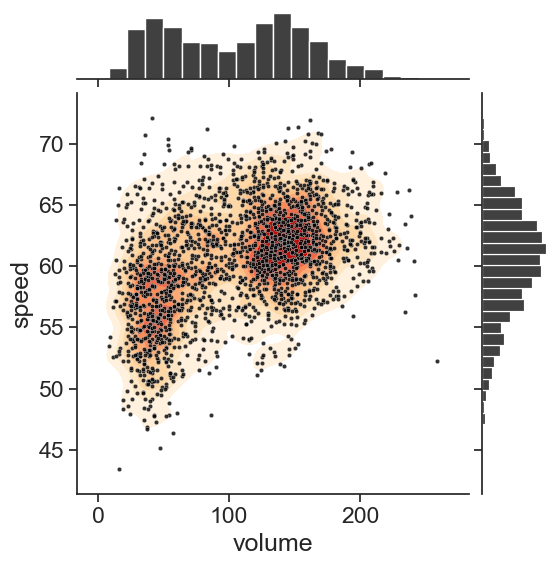

In [9]:
#combine histogram and scatter plot in the same figure
g=sns.jointplot(data=df, x="volume", y="speed",alpha=0.8,s=10,color='k')
g.plot_joint(sns.kdeplot, cmap='OrRd',zorder=0,shade=True,bw_method=0.15)

## Categorical comparisons 
Now assume you have the same set of data in different categories, and you would like to get an idea on how are they different. 
In this case:  we have speed data from Monday, Tuesday, ..., Sunday 

#### First step: separate the data into corresponding categories


In [10]:
df['day']=df['measurement_start'].dt.day_name() #convert date time into corresponding day of the week 
df.head

<bound method NDFrame.head of         measurement_start      speed  volume  occupancy       day
180   2017-11-03 00:00:00  57.511966      48   1.577778    Friday
181   2017-11-03 00:05:00  57.952963      55   1.400000    Friday
182   2017-11-03 00:10:00  57.243963      70   2.333333    Friday
183   2017-11-03 00:15:00  60.220578      59   1.711111    Friday
184   2017-11-03 00:20:00  60.527407      55   2.022222    Friday
...                   ...        ...     ...        ...       ...
11011 2017-11-09 23:35:00  57.388039      73   2.444444  Thursday
11012 2017-11-09 23:40:00  58.526888      89   2.488889  Thursday
11013 2017-11-09 23:45:00  58.964762      59   1.644444  Thursday
11014 2017-11-09 23:50:00  60.023469      58   1.933333  Thursday
11015 2017-11-09 23:55:00  56.607063      77   2.244444  Thursday

[2016 rows x 5 columns]>

Now lets compare the speed in different day of the week. In this case we look at bar chart.

### Bar chart
The bar chart will visualize both mean and standard deviation of your figure. 
The x-axis is the categorial value, and y-axis is the numerical values. 

Documentation: https://seaborn.pydata.org/generated/seaborn.barplot.html

[Text(0, 0, 'Friday'),
 Text(1, 0, 'Saturday'),
 Text(2, 0, 'Sunday'),
 Text(3, 0, 'Monday'),
 Text(4, 0, 'Tuesday'),
 Text(5, 0, 'Wednesday'),
 Text(6, 0, 'Thursday')]

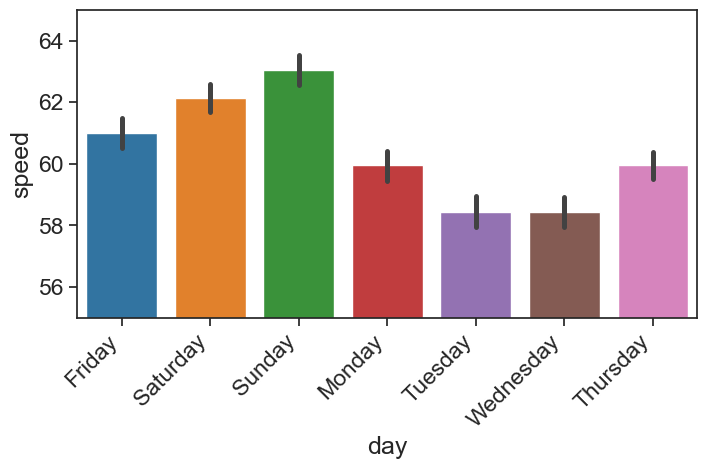

In [11]:
fig,ax=plt.subplots(1,1,figsize=(8,4))
sns.barplot(x="day", y="speed", data=df,ax=ax)

#trim the figure slightly
ax.set_ylim([55,65])


# rotation of the x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

(55.0, 65.0)

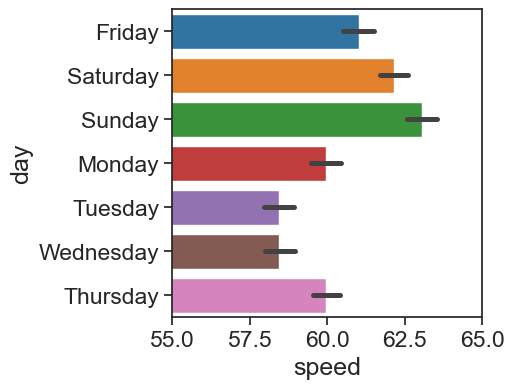

In [12]:
#horizontal.... 
fig,ax=plt.subplots(1,1,figsize=(4,4))
sns.barplot(x="speed", y="day", data=df,ax=ax)

#trim the figure slightly
ax.set_xlim([55,65])

[Text(0, 0, 'Friday'),
 Text(1, 0, 'Saturday'),
 Text(2, 0, 'Sunday'),
 Text(3, 0, 'Monday'),
 Text(4, 0, 'Tuesday'),
 Text(5, 0, 'Wednesday'),
 Text(6, 0, 'Thursday')]

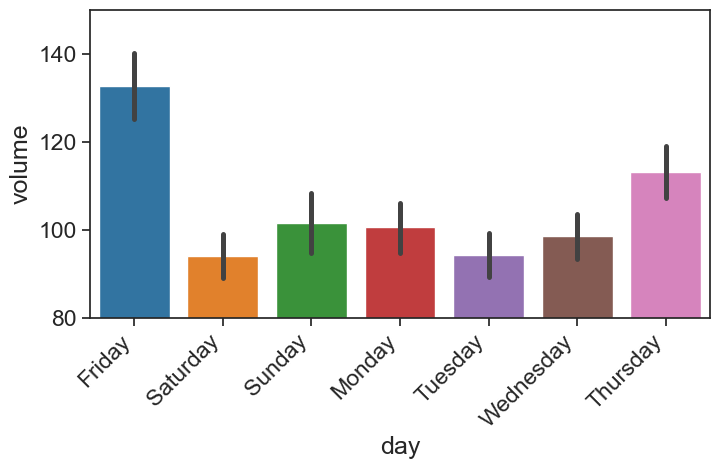

In [13]:
##let's visualize volume as well 

fig,ax=plt.subplots(1,1,figsize=(8,4))
sns.barplot(x="day", y="volume", data=df,ax=ax)

#trim the figure slightly
ax.set_ylim([80,150])


# rotation of the x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


Bar plot only provides limited information, e.g., the mean and the confidence interval. 

What can we do if we would like to **know more about the distribution of each category**? 
### Box plot
Box plot shows the quartile of your data, as well as the outliers based on your data distribution. 

Documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:xlabel='day', ylabel='speed'>

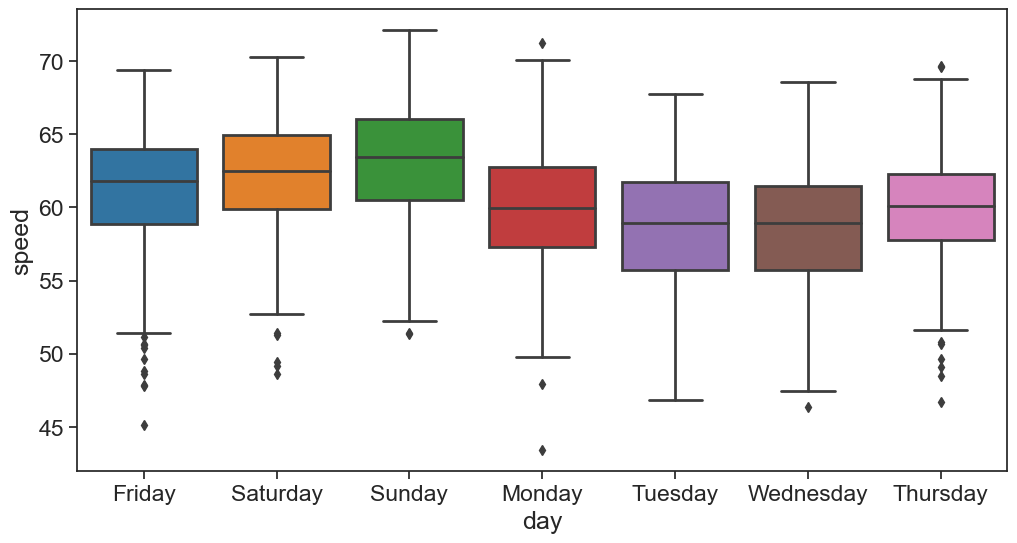

In [14]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
sns.boxplot(x="day", y="speed", data=df,ax=ax)

But what are the distribution of the data as compared to the quartiles?

### Violin plot
Violin plot visualizes the distribution of the data along with the statistics from the box plot. 
Documentation: https://seaborn.pydata.org/generated/seaborn.violinplot.html

<AxesSubplot:xlabel='day', ylabel='speed'>

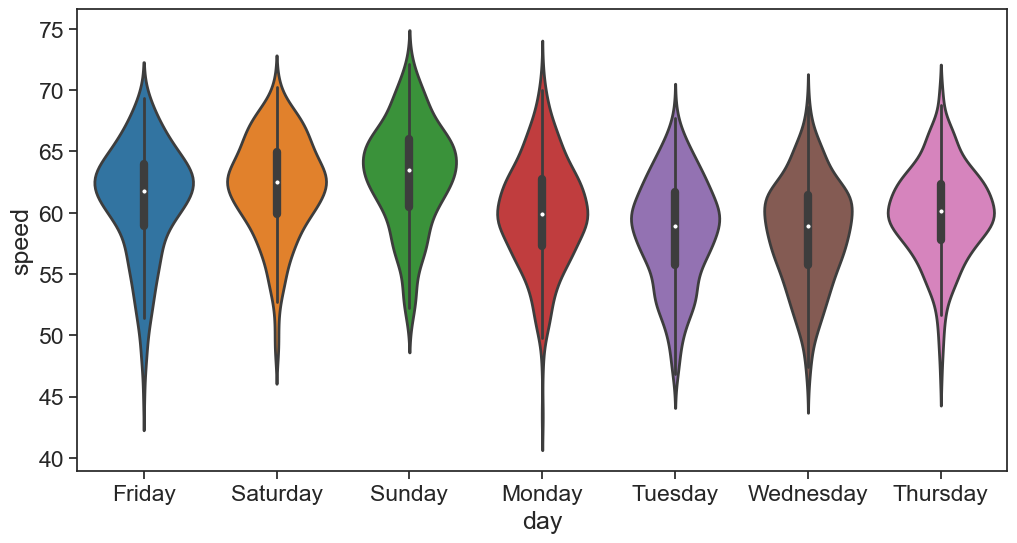

In [15]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
sns.violinplot(x="day", y="speed", data=df,ax=ax)

### Export your plot

After you draw your figure, the next step is to save the plot file so you can add this to your report / research paper. Typical plot files include .jpg, .png, .tiff, .pdf, .svg, .eps. 

Among all these files, .jpg, .png, .tiff are **raster images**. Their resolution are based on the pixels. 
The other three files are **vector images**, the resolution is independent of the pixels, and maintain high resolution. 

Using **vector images** is always preferred for scientific documentation purposes. 

Lets compare!

In [16]:
#Command for save your output
#Raster file
# fig.savefig('png_output.png')
# fig.savefig('pdf_output.pdf')

# Part 2: Get Summary Statistics of Your Data

It is often the case that you need to present a summary of your data in your report or in your research paper. And we can do this in two different ways. 

### 1. Use summary statistics function in pandas

In [17]:
import pandas as pd

infile='data/traffic_data.csv'  
df=pd.read_csv(infile,parse_dates=['measurement_start'],usecols=['zone_id','measurement_start','speed','volume','occupancy'])
df['day']=df['measurement_start'].dt.day_name() #convert date time into corresponding day of the week 
df['weekend']=np.where((df['measurement_start']).dt.dayofweek < 5,0,1) #CHECK  if the day is weekend or not 
#simply use the describe function to get the statistics of your numerical values
df.describe()
df.describe(include='all')

C:\Users\sguo18\AppData\Local\Temp\2/ipykernel_19312/2951666286.py:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,zone_id,measurement_start,speed,volume,occupancy,day,weekend
count,12096.000000,12096,12096.000000,12096.000000,12096.000000,12096,12096.000000
unique,NaN,2016,NaN,NaN,NaN,7,NaN
top,NaN,2017-11-03 00:00:00,NaN,NaN,NaN,Friday,NaN
freq,NaN,6,NaN,NaN,NaN,1728,NaN
first,NaN,2017-11-03 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-11-09 23:55:00,NaN,NaN,NaN,NaN,NaN
mean,10179.166667,NaN,64.116552,104.608383,2.826062,NaN,0.285714
std,320.177472,NaN,8.449250,56.392604,1.579617,NaN,0.451773
min,10031.000000,NaN,22.130678,8.000000,0.111111,NaN,0.000000
25%,10032.000000,NaN,58.004200,51.000000,1.600000,NaN,0.000000


### 2. Use seaborn to perform pairwise plotting

Documentation: https://seaborn.pydata.org/generated/seaborn.pairplot.html

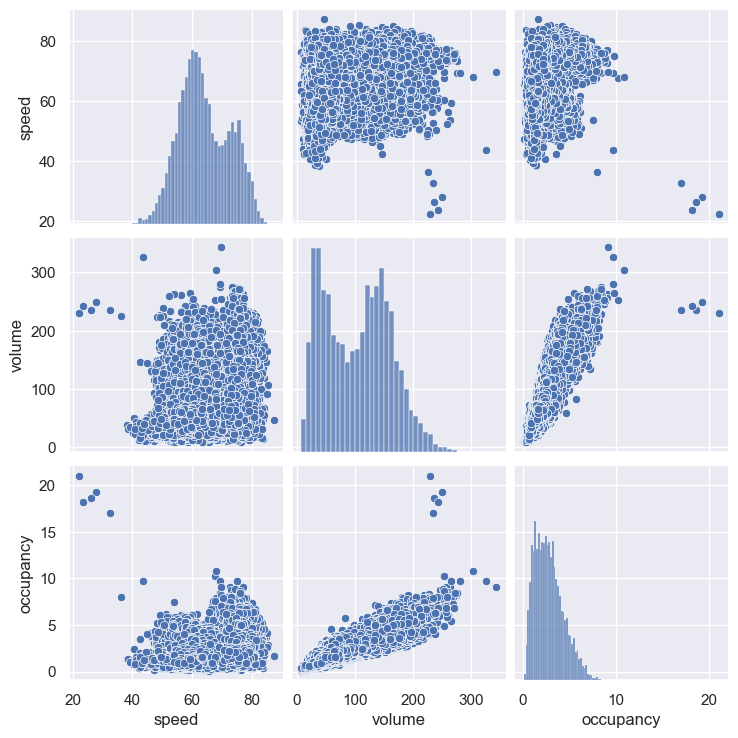

In [18]:
sns.set(rc={'figure.figsize':(15,15)})
sns.pairplot(df[['speed','volume','occupancy']])

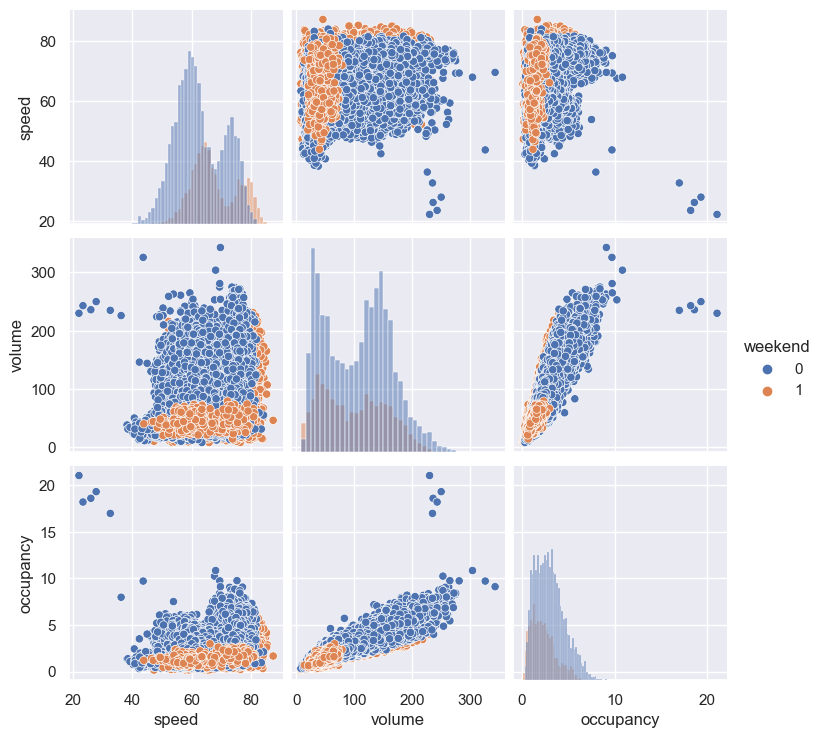

In [19]:
#lets make a more delicate version 
df.head()
sns.pairplot(df[['speed','volume','occupancy','weekend']],hue='weekend',diag_kind="hist")

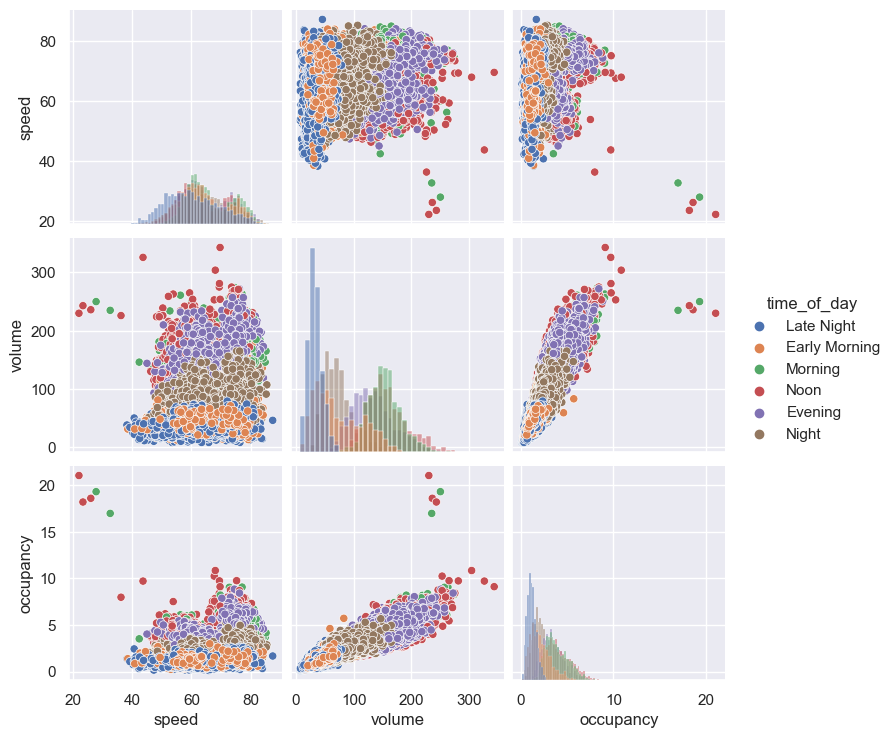

In [20]:
## Additional step:
df['time_of_day'] = (df['measurement_start'].dt.hour)//4
df['time_of_day'].replace({0: 'Late Night',
                      1: 'Early Morning',
                      2: 'Morning',
                      3: 'Noon',
                      4: 'Evening',
                      5: 'Night'}, inplace=True)

sns.pairplot(df[['speed','volume','occupancy','time_of_day']],hue='time_of_day',diag_kind="hist")

# Part 2: Spatial Processing with Geopandas

Geopandas is the go to package when you want to work on shapefile.
Shapefile contains spatial objects such as point, polyline, polygon. Geopandas is built on pandas and can be used to process, visualize shapefiles and perform spatial algorithms. Geopandas parse a shapefile into a DataFrame.

For tutorials, check: https://geopandas.org/

Usage:**'import geopandas as gpd'**

In many cases, our data contains latitude and longitude information. This makes it necessary to conduct our analysis with the corresponding shapefile and understand the data from the spatial context. 

In [21]:
##Read the data
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import geopandas as gpd

road_df=gpd.read_file('data/Tuscaloosa_road/Tuscaloosa_County_Roads.shp') #read the road network shapefile

zip_df=gpd.read_file('data/CBG/cb_2018_us_zcta510_500k.shp') #read the zcta shapefile

# zip code of interest (in this case, Tuscaloosa city)
zip_range=[35405,35401,35404,35473,35406,35475,35453,35476,35474,35466,35546,35490,35456,\
35444,35452,35579,35188,35446,35463,35407,35480,35403,35402,35458,35469,35478,35449,35482,35457,35440,35486,35468,\
35485,35487]

In [22]:
#take a look at road shapefile
print(zip_df.columns)
road_df.head()


Index(['ZCTA5CE10', 'AFFGEOID10', 'GEOID10', 'ALAND10', 'AWATER10',
       'geometry'],
      dtype='object')


,FID,LINEARID,FULLNAME,RTTYP,MTFCC,Shape__Len,geometry
0,1,11084709433,None,None,S1400,102.948478,"LINESTRING (-87.53009 33.13045, -87.52974 33.1..."
1,2,11084692652,White Oaks Ln,M,S1400,437.059199,"LINESTRING (-87.32591 33.24605, -87.32448 33.2..."
2,3,11084670850,Co Rd 88,C,S1400,4680.430756,"LINESTRING (-87.56716 33.21325, -87.56704 33.2..."
3,4,11084709723,None,None,S1400,263.507162,"LINESTRING (-87.41462 33.27598, -87.41469 33.2..."
4,5,11084708965,None,None,S1400,364.999546,"LINESTRING (-87.52662 33.13047, -87.52652 33.1..."


In [24]:
#take a look at zip code areas
zip_df.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,36083,8600000US36083,36083,659750662,5522919,"MULTIPOLYGON (((-85.63225 32.28098, -85.62439 ..."
1,35441,8600000US35441,35441,172850429,8749105,"MULTIPOLYGON (((-87.83287 32.84437, -87.83184 ..."
2,35051,8600000US35051,35051,280236456,5427285,"POLYGON ((-86.74384 33.25002, -86.73802 33.251..."
3,35121,8600000US35121,35121,372736030,5349303,"POLYGON ((-86.58527 33.94743, -86.58033 33.948..."
4,35058,8600000US35058,35058,178039922,3109259,"MULTIPOLYGON (((-86.87884 34.21196, -86.87649 ..."


The zip code area covers the entire United States.... Lets find those areas that are only within Tuscaloosa County. 

In [25]:
#Remove missing values
import numpy as np
import matplotlib.pyplot as plt
zip_df['GEOID10']=zip_df['GEOID10'].astype(int)

#find the set of index that are in the zip range
idx=zip_df['GEOID10'].isin(zip_range).astype(bool)
#create the new dataframe
newzip_df=zip_df[idx]


Lets visualize the two shapefiles using geopandas.

See documentation for visualization: https://geopandas.org/gallery/plotting_with_geoplot.html

<AxesSubplot:>

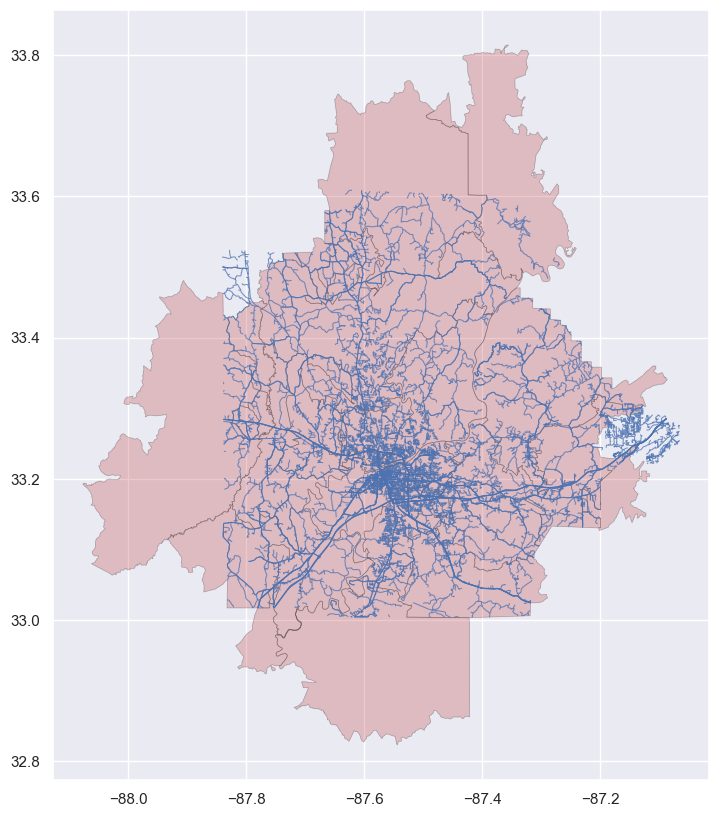

In [27]:
#plot
fig,ax=plt.subplots(1,1,figsize=(10,10))
newzip_df.plot(ax=ax,facecolor='r',alpha=0.3, edgecolor='k', linewidth=0.5)
road_df.plot(ax=ax,edgecolor='b', alpha=0.75, linewidth=0.75)

Now lets do some spatial processing of two shapefiles with geopandas! 

For more operations, check the link: https://geopandas.org/docs/user_guide/set_operations.html

Our purpose is to find the set of road segments that lie within our shapefile regions.So we will use intersection function!

But first... lets make sure both shapefiles are on the same projection system. In our case, **we need to project the zip code shapefile.**

Know more of the projection system here: https://geopandas.org/docs/user_guide/projections.html

In [28]:
newzip_df=newzip_df.to_crs('EPSG:4326')
county_road=gpd.overlay(road_df,newzip_df,how='intersection')

In [29]:
county_road.head()

,FID,LINEARID,FULLNAME,RTTYP,MTFCC,Shape__Len,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,1,11084709433,None,None,S1400,102.948478,35405,8600000US35405,35405,123140780,2140953,"LINESTRING (-87.53009 33.13045, -87.52974 33.1..."
1,5,11084708965,None,None,S1400,364.999546,35405,8600000US35405,35405,123140780,2140953,"LINESTRING (-87.52662 33.13047, -87.52652 33.1..."
2,9,1105598219908,Jug Factory Rd,M,S1400,4532.600187,35405,8600000US35405,35405,123140780,2140953,"MULTILINESTRING ((-87.52561 33.16432, -87.5252..."
3,11,11084689828,Fieldwood Dr,M,S1400,262.450126,35405,8600000US35405,35405,123140780,2140953,"LINESTRING (-87.52045 33.14747, -87.52042 33.1..."
4,12,11084690141,Inverness Pkwy,M,S1400,1580.499904,35405,8600000US35405,35405,123140780,2140953,"LINESTRING (-87.55758 33.12837, -87.55750 33.1..."


Text(0.5, 1.0, 'Tuscaloosa County Zip code and Road network')

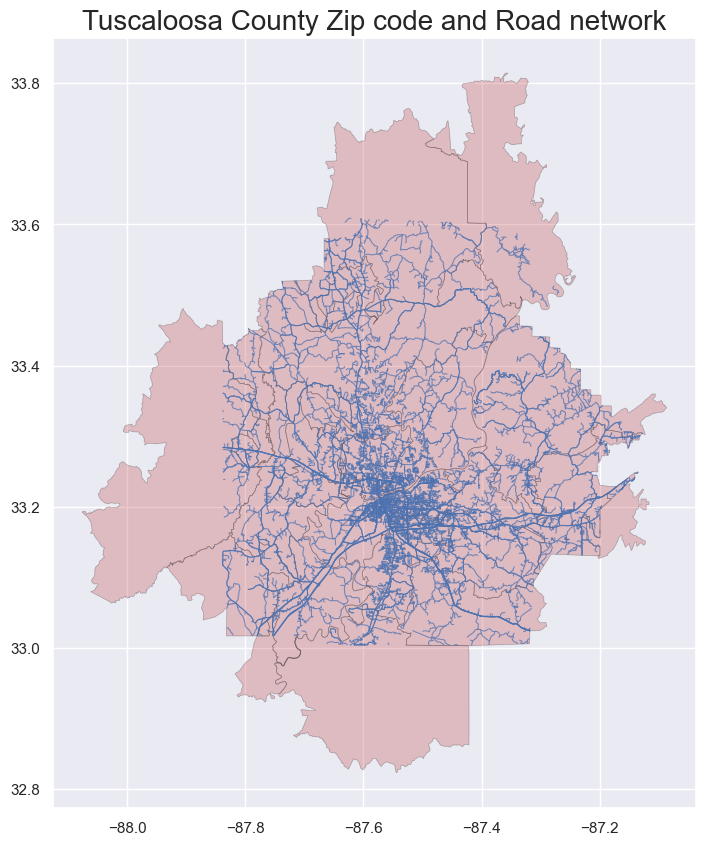

In [30]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
newzip_df.plot(ax=ax,facecolor='r',edgecolor='k',alpha=0.3, linewidth=0.5)
county_road.plot(ax=ax,edgecolor='b', alpha=0.75, linewidth=0.75)
ax.set_title('Tuscaloosa County Zip code and Road network',fontsize=20)

Nowe lets do some manipulation....We would like to assign some speed to the road network, and visualize the results. 

In [31]:
nsample=county_road.shape[0] #this returns the number of links.
speed=30+40*np.random.random(nsample)   #remember, random.random return random variabies in the range [0,1]
county_road['speed']=speed

Now lets do the visualization again. 

**Questions: How to choose your colormap?** 

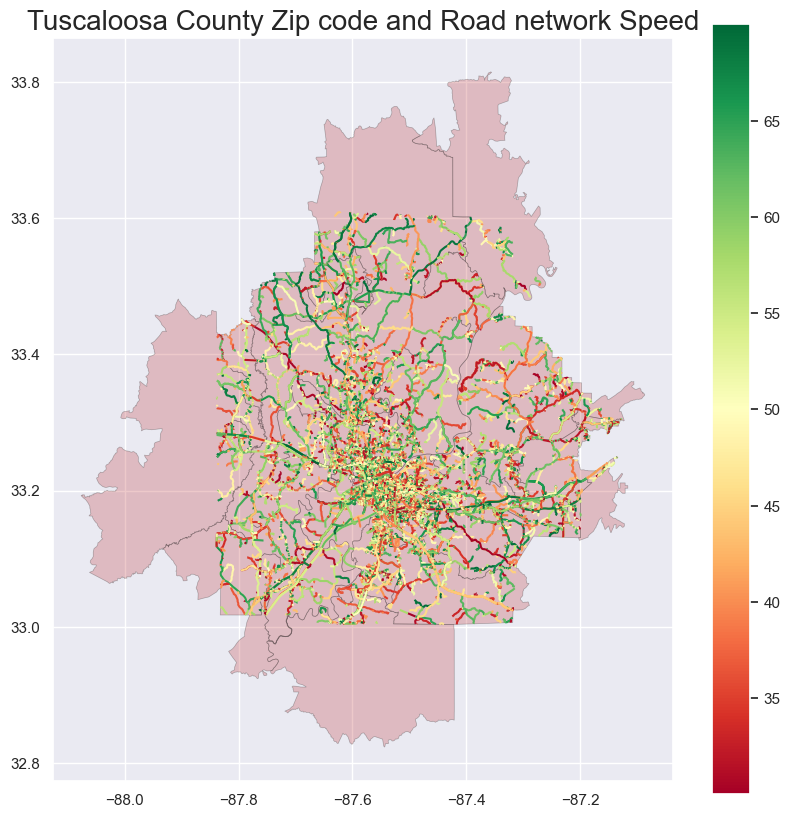

In [32]:
#Lets visualize again, but this time gives attribute to road network 
fig,ax=plt.subplots(1,1,figsize=(10,10))
newzip_df.plot(ax=ax,facecolor='r',edgecolor='k',alpha=0.3, linewidth=0.5)
county_road.plot('speed',ax=ax,cmap='RdYlGn',legend=True)
ax.set_title('Tuscaloosa County Zip code and Road network Speed',fontsize=20)

#let's save it
fig.savefig('results/County_speed.pdf')

### Length of road segments (Interplay between two shapefiles) 

Let's do a further analysis: **what is the network density in area zip code area?**

Easy to manipulate with geomtery calculations in geopandas...

In [33]:
newzip_df.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
463,35579,8600000US35579,35579,365940018,6972292,"MULTIPOLYGON (((-87.36230 33.81106, -87.36134 ..."
728,35446,8600000US35446,35446,157481820,2010613,"POLYGON ((-87.82409 33.16745, -87.82025 33.168..."
1662,35453,8600000US35453,35453,240893646,3714420,"MULTIPOLYGON (((-87.46013 33.19529, -87.45900 ..."
1793,35452,8600000US35452,35452,134673778,1707182,"MULTIPOLYGON (((-87.63910 33.25352, -87.63380 ..."
1951,35458,8600000US35458,35458,66208332,1280541,"MULTIPOLYGON (((-87.82425 33.27905, -87.82178 ..."


In [34]:
county_road.head()

,FID,LINEARID,FULLNAME,RTTYP,MTFCC,Shape__Len,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,speed
0,1,11084709433,None,None,S1400,102.948478,35405,8600000US35405,35405,123140780,2140953,"LINESTRING (-87.53009 33.13045, -87.52974 33.1...",48.347981
1,5,11084708965,None,None,S1400,364.999546,35405,8600000US35405,35405,123140780,2140953,"LINESTRING (-87.52662 33.13047, -87.52652 33.1...",56.176914
2,9,1105598219908,Jug Factory Rd,M,S1400,4532.600187,35405,8600000US35405,35405,123140780,2140953,"MULTILINESTRING ((-87.52561 33.16432, -87.5252...",50.177653
3,11,11084689828,Fieldwood Dr,M,S1400,262.450126,35405,8600000US35405,35405,123140780,2140953,"LINESTRING (-87.52045 33.14747, -87.52042 33.1...",38.512743
4,12,11084690141,Inverness Pkwy,M,S1400,1580.499904,35405,8600000US35405,35405,123140780,2140953,"LINESTRING (-87.55758 33.12837, -87.55750 33.1...",46.096413


In [35]:
print(county_road.iloc[0].geometry)

m_county_road=county_road.to_crs('EPSG:3857')
#project to 3857 for meters calculation

print(m_county_road.iloc[0].geometry)
print(m_county_road.geometry.length)

LINESTRING (-87.5300900645519 33.1304491846617, -87.529738064452 33.1304281846707, -87.5291670642903 33.1304011846868)
LINESTRING (-9743805.055075292 3912631.7389714066, -9743765.870603412 3912628.947439516, -9743702.30715617 3912625.358328667)
0         102.948478
1         364.999546
2        4176.160895
3         262.450126
4        1580.499904
            ...     
11983     521.490823
11984     209.856401
11985    1333.389023
11986     451.469978
11987     595.199646
Length: 11988, dtype: float64


In [36]:
m_county_road["length"] = m_county_road.geometry.length

### If we take a further look at the zip codes:

In [37]:
selected_zip_codes = [35188,35401,35404,35405,35406,35407,35444,35446,35453,35456,35458,35463]

In [38]:
selected_m_county_road = m_county_road[m_county_road['GEOID10'].isin(selected_zip_codes)]

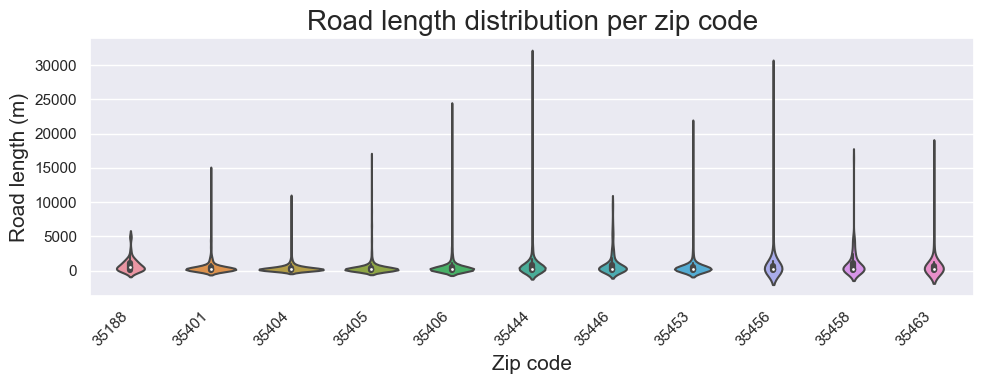

In [39]:
# violin plot of speed per zip code

fig,ax=plt.subplots(1,1,figsize=(10,4))
sns.violinplot(x="GEOID10", y="length", data=selected_m_county_road,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

ax.set_title('Road length distribution per zip code',fontsize=20)
ax.set_xlabel('Zip code',fontsize=15)
ax.set_ylabel('Road length (m)',fontsize=15)

plt.tight_layout()
fig.savefig('results/County_length_violin.pdf')

In [40]:
##we can run a for loop.....
newzip_df['road_density']=0
for zid in zip_range:
    features=m_county_road[m_county_road['GEOID10']==zid]
    zip_area=newzip_df[newzip_df['GEOID10']==zid].to_crs('EPSG:3857')
    newzip_df.loc[newzip_df['GEOID10']==zid,'road_density']=sum(features.geometry.length)/(sum(zip_area.geometry.area)+1)

Text(0.5, 1.0, 'Road density map in Tuscaloosa County')

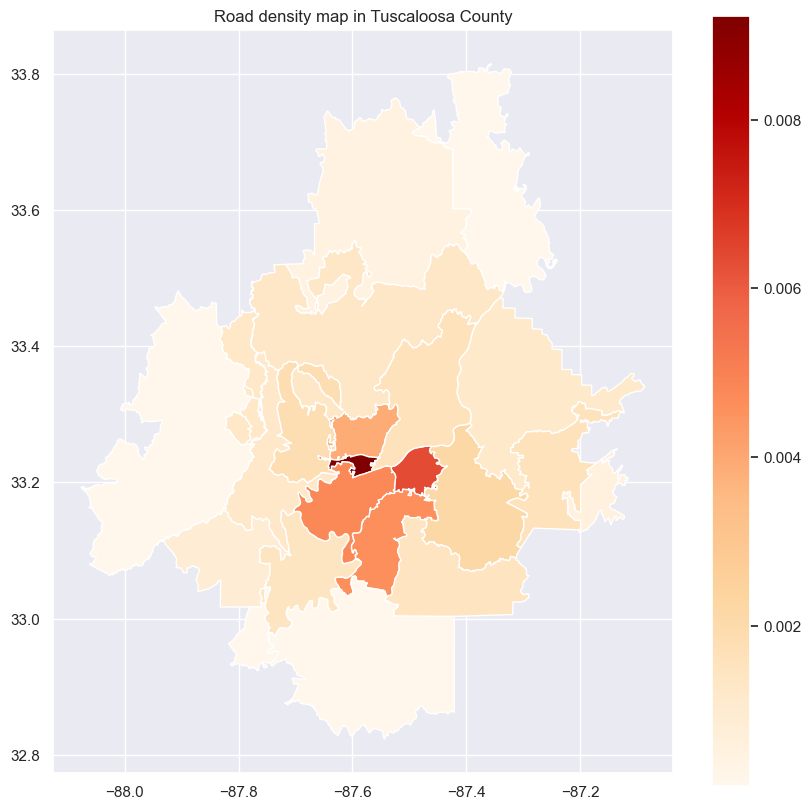

In [41]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
newzip_df.plot(column='road_density',cmap='OrRd',ax=ax,legend=True)
ax.set_title('Road density map in Tuscaloosa County')

C:\Users\sguo18\AppData\Local\Temp\2/ipykernel_19312/3444161975.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pts=newzip_df.geometry.centroid


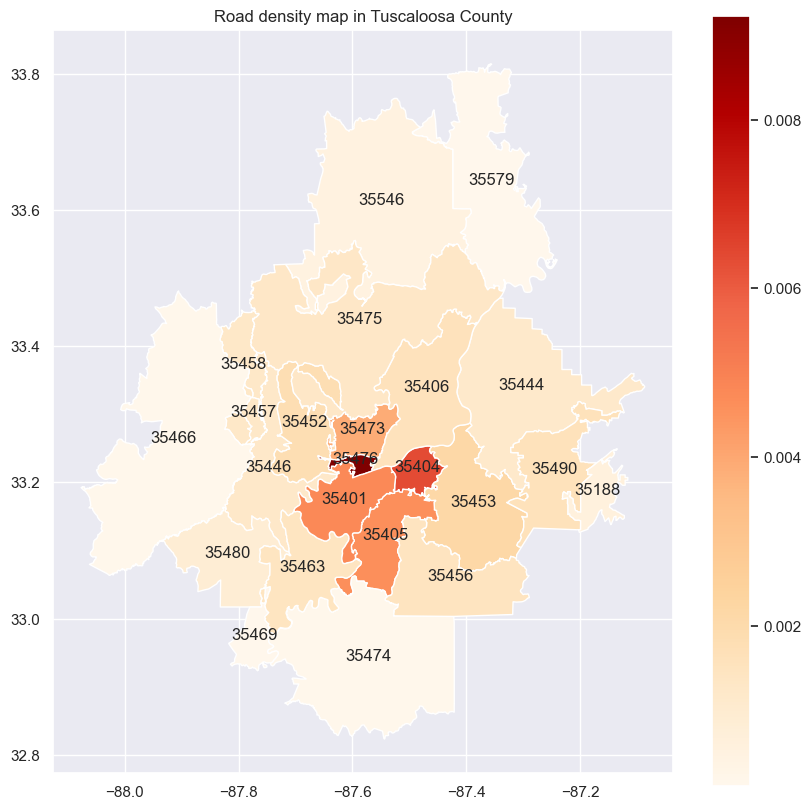

In [42]:
#Now assume you want to annotate each polygon area
fig,ax=plt.subplots(1,1,figsize=(10,10))
newzip_df.plot(column='road_density',cmap='OrRd',ax=ax,legend=True)
ax.set_title('Road density map in Tuscaloosa County')

pts=newzip_df.geometry.centroid

for idx, row in newzip_df.iterrows():
    ax.text(s=row['GEOID10'], x=pts.loc[idx].x,y=pts.loc[idx].y,
                 horizontalalignment='center')